In [13]:
import pandas as pd

In [14]:
df=pd.read_csv("erzaq.csv")

In [15]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [33]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


In [17]:
x=df[["Income","Recency","MntWines","MntFruits","MntMeatProducts"]]

In [88]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [149]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [150]:
dbscan.fit(X_scaled)

DBSCAN()

In [151]:
labels = dbscan.labels_

In [152]:
print(labels)

[-1  0 -1 ... -1 11  0]


In [153]:
core_samples_mask = np.zeros_like(labels, dtype=bool)

In [154]:
core_samples_mask[dbscan.core_sample_indices_] = True

In [155]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)


In [156]:
n_noise_points = list(labels).count(-1)


In [157]:
df['cluster'] = labels
df['is_core'] = core_samples_mask

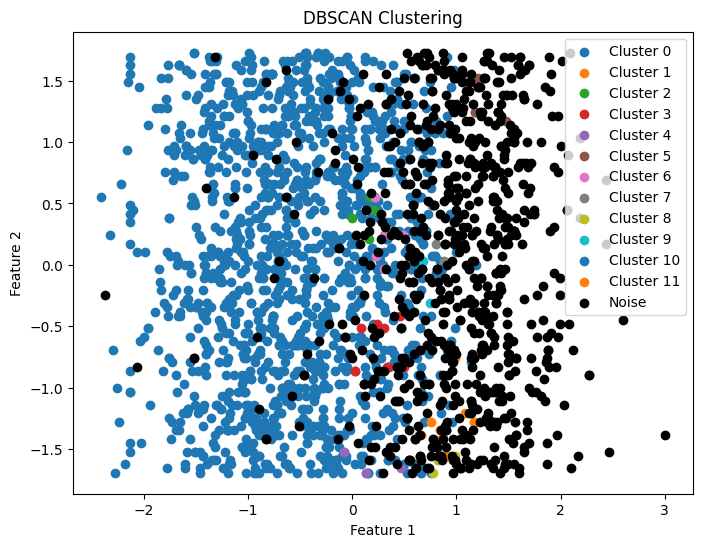

In [158]:
plt.figure(figsize=(8, 6))

# Plot points belonging to each cluster
for cluster_label in set(labels):
    if cluster_label == -1:
        # Noise points are plotted in black
        cluster_mask = (labels == cluster_label)
        plt.scatter(X_scaled[cluster_mask, 0], X_scaled[cluster_mask, 1], c='black', label='Noise')
    else:
        # Points belonging to clusters are plotted with different colors
        cluster_mask = (labels == cluster_label)
        plt.scatter(X_scaled[cluster_mask, 0], X_scaled[cluster_mask, 1], label=f'Cluster {cluster_label}')

# Plot core points as larger points
#core_points = X_scaled[core_samples_mask]
#plt.scatter(core_points[:, 0], core_points[:, 1], s=100, c='red', marker='x', label='Core Points')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

In [87]:
df['cluster'].value_counts()

cluster
 0    2204
-1       1
Name: count, dtype: int64